In [1]:
f = open('/Users/Ada/Github/Text_Analysis/policy_address_2017_eng.txt', 'r', encoding='utf-8')
content = f.read()
#content = f.readlines()

In [2]:
print (content[:10])

The Chief 


In [ ]:
# convert raw text into nltk text format
import nltk

# tokenize content of input source
tokens = nltk.word_tokenize(content)
tokens = [word.lower() for word in tokens]
nltk_content = nltk.Text(tokens)
corpus_content = nltk.corpus(tokens)
print (nltk_content[:10])
type(nltk_content)

In [35]:
# count number of tokens
print ("number of tokens: ", len(tokens))
# serach text & find similar words
print (nltk_content.concordance("government", lines=10))
nltk_content.similar('government')

number of tokens:  38104
Displaying 10 of 296 matches:
uthorities 8–18 new roles for the government 8–9 upholding the principle of me
ocracy 10–11 open and transparent government 12 boosting implementation capabi
d initiatives of the current‑term government for different policy areas . i ho
ugural ceremony of the fifth‑term government of the hong kong special administ
r of urgency . i propose that the government should be more proactive and play
g needs is our top priority . the government has no magic wands , but in the p
s a key focus of the current‑term government . for some time in the past there
rging the responsibilities of the government as a “ service provider ” or a “ 
in taking up the new roles of the government as a “ facilitator ” and a “ prom
aw , a highly efficient and clean government , freedom of the press , respect 
None
community mainland scheme world public legco hkdc commission industry
review region hksar doj aahk edb hkha ha service office judiciary


In [61]:
# Try different methods of stemming
wnl = nltk.WordNetLemmatizer()
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

words = ['women','ladies','men', 'investments','begun','begin','began','starting','start','started']
print ([wnl.lemmatize(t.lower()) for t in words])
print ([porter.stem(t.lower()) for t in words])
print ([lancaster.stem(t.lower()) for t in words])

['woman', 'lady', 'men', 'investment', 'begun', 'begin', 'began', 'starting', 'start', 'started']
['women', 'ladi', 'men', 'invest', 'begun', 'begin', 'began', 'start', 'start', 'start']
['wom', 'lady', 'men', 'invest', 'begun', 'begin', 'beg', 'start', 'start', 'start']


In [36]:
wnl = nltk.WordNetLemmatizer()
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

pro_content = [wnl.lemmatize(t.lower()) for t in tokens]

In [43]:
print (pro_content[:50] , "\n")
print (content[:290])

['the', 'chief', 'executive', '’', 's', '2017', 'policy', 'address', 'we', 'connect', 'for', 'hope', 'and', 'happiness', 'i', '.', 'introduction', ':', 'a', 'new', 'beginning', '1–6', 'ii', '.', 'good', 'governance', '7–34', 'my', 'belief', '7', 'executive', 'authority', '8–18', 'new', 'role', 'for', 'the', 'government', '8–9', 'upholding', 'the', 'principle', 'of', 'meritocracy', '10–11', 'open', 'and', 'transparent', 'government', '12'] 

The Chief Executive’s 2017 Policy Address
We Connect for
Hope and Happiness
I. Introduction: A New Beginning 1–6
II. Good Governance 7–34
My Belief 7
Executive Authorities 8–18
New Roles for the Government 8–9
Upholding the Principle of Meritocracy 10–11
Open and Transparent Government 12



In [94]:
import nltk.data
tagger = nltk.data.load("taggers/NAME_OF_TAGGER.pickle")

tagged_words = tagger.tag(pro_content)

print (tagged_words[:20])
#nltk_content_tagged = nltk_content.tagged_words(categories='news', tagset='universal')
#tag_fd = nltk.FreqDist(tag for (word, tag) in nltk_content_tagged )
#tag_fd.most_common()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


SystemExit: 0

/Users/Ada/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
import re
#Type 1: token words by space
A = re.split(r' ', content.lower())

#Type 2: token words by tab or newline
B = re.split(r'[ \t\n]+', content.lower())

#type 3: token words by words or numbers [a-zA-Z0-9_]
C= re.split(r'\W+', content.lower())

#type 4: NLTK tokenization - For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences:

pattern = r'\w+|\$[\d\.]+|\S+'

D = nltk.regexp_tokenize(content.lower(), pattern)

print (A[:20],"\n", B[:20], "\n", C[:20],"\n", D[:20])


['the', 'chief', 'executive’s', '2017', 'policy', 'address\nwe', 'connect', 'for\nhope', 'and', 'happiness\ni.', 'introduction:', 'a', 'new', 'beginning', '1–6\nii.', 'good', 'governance', '7–34\nmy', 'belief', '7\nexecutive'] 
 ['the', 'chief', 'executive’s', '2017', 'policy', 'address', 'we', 'connect', 'for', 'hope', 'and', 'happiness', 'i.', 'introduction:', 'a', 'new', 'beginning', '1–6', 'ii.', 'good'] 
 ['the', 'chief', 'executive', 's', '2017', 'policy', 'address', 'we', 'connect', 'for', 'hope', 'and', 'happiness', 'i', 'introduction', 'a', 'new', 'beginning', '1', '6'] 
 ['the', 'chief', 'executive', '’s', '2017', 'policy', 'address', 'we', 'connect', 'for', 'hope', 'and', 'happiness', 'i', '.', 'introduction', ':', 'a', 'new', 'beginning']


In [14]:
# longest word from content
maxlen = max(len(word) for word in D)
[word for word in D if len(word) == maxlen]

['“community‑business‑government”']

In [16]:
# combine tokenized text:

New_content = ' '.join(D)
print (New_content[:100])

# it turns back into string now

the chief executive ’s 2017 policy address we connect for hope and happiness i . introduction : a ne


In [17]:
# Find similar words
New_content.similar('government')

AttributeError: 'str' object has no attribute 'similar'

In [194]:
import numpy as np
fdist = nltk.FreqDist(D)
type(fdist)
word = [word for word in fdist]
word_cnt = [int(fdist[word]) for word in fdist]
#for word in sorted(fdist):
#    if fdist[word] >50:
#        print(word, '->', fdist[word], end='; ')
print (word[:10])
print (word_cnt[:10])


word_arry = list(zip(word, word_cnt))
import operator
word_arry = sorted(word_arry,key=lambda x: x[1], reverse=True)
print (word_arry[:10])
top_words = word_arry[:30]

['the', 'chief', 'executive', '’s', '2017', 'policy', 'address', 'we', 'connect', 'for']
[2730, 33, 32, 134, 15, 65, 17, 294, 8, 527]
[('the', 2730), ('and', 1451), ('.', 1403), (',', 1325), ('of', 1205), ('to', 1176), ('in', 809), ('for', 527), ('will', 496), ('a', 489)]


In [195]:
#bar chart to visualize top words
 
objects = [top_words[i][0] for i in range(len(top_words))]

performance = [top_words[i][1] for i in range(len(top_words))]
 

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='EddieChan', api_key='If6JYjOdhBaWDmRoKh4E')


data = [go.Bar(
            x=performance,
            y=objects,
            orientation = 'h'
)]

py.iplot(data, filename='horizontal-bar')



In [30]:
# list of the files & folder in the root directory
import os
os.listdir('.')

# remove \n character in new lines - works in string
#line.strip()


SyntaxError: invalid syntax (<ipython-input-30-495948556e0f>, line 7)

In [3]:
path = nltk.data.find('/Users/Ada/Github/Text_Analysis/policy_address_2017_eng.txt')
raw = open(path, 'rU').read()
print(raw[:100])

NameError: name 'nltk' is not defined

In [42]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) 
        traverse(graph, start, child) 

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = True,
         font_size = 6)
    matplotlib.pyplot.show()

/Users/Ada/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/Ada/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/Ada/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Ada/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

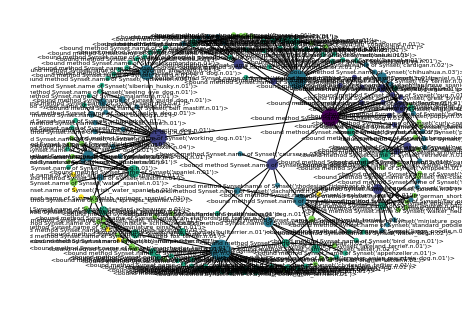

In [44]:
from networkx.drawing.nx_agraph import graphviz_layout
dog = wn.synset('dog.n.01')

graph = hyponym_graph(dog)
graph_draw(graph)

In [19]:
?nx.draw_graphviz